# Project 4: NYC Tree Census

This dashboard can be used by an arborist studying the health of various tree species. It allows them to see the proportion of trees by health in each boro. The dashboard also allows the user to see tree health by the steward activity. 


# Load Data

The tree data is available online here: https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh in JSON. We can load it into Python so we can pivot and use it.

In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import pandas as pd


health_query = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=boroname,health,steward,count(tree_id)' +\
        '&$group=boroname,steward,health').replace(' ', '%20')

df = pd.read_json(health_query)

df.head(10)

,boroname,count_tree_id,health,steward
0,Bronx,2130,Fair,1or2
1,Bronx,12038,Good,1or2
2,Bronx,640,Poor,1or2
3,Bronx,125,Fair,3or4
4,Bronx,689,Good,3or4
5,Bronx,41,Poor,3or4
6,Bronx,7,Fair,4orMore
7,Bronx,62,Good,4orMore
8,Bronx,2,Poor,4orMore
9,Bronx,8625,Fair,None


# Dash Layout

We'll set up our dashboard to show the number of trees by their health status and distributed by their steward activity. There will also be a filter to allow the user to look at the data by boro.

In [3]:
tree_options = df["boroname"].unique()

app = dash.Dash()

app.layout = html.Div([
    html.H2("Tree Health by # of Stewards"),
    html.Div(
        [
            dcc.Dropdown(
                id="boroname",
                options=[{
                    'label': i,
                    'value': i
                } for i in tree_options],
                value='All Boros'),
        ],
        style={'width': '25%',
               'display': 'inline-block'}),
    dcc.Graph(id='funnel-graph'),
])

# Dash Output

Our output let's the user see the data for all boros and for each specified boro.

In [6]:
@app.callback(
    dash.dependencies.Output('funnel-graph', 'figure'),
    [dash.dependencies.Input('boroname', 'value')])
def update_graph(boroname):
    if boroname == "All Boros":
        df_plot = df.copy()
    else:
        df_plot = df[df['boroname'] == boroname]

    pv = pd.pivot_table(
        df_plot,
        index=['steward'],
        columns=['health'],
        values=['count_tree_id'],
        aggfunc=sum,
        fill_value=0)

    trace1 = go.Bar(x=pv.index, y=pv[('count_tree_id', 'Fair')], name='Fair')
    trace2 = go.Bar(x=pv.index, y=pv[('count_tree_id', 'Good')], name='Good')
    trace3 = go.Bar(x=pv.index, y=pv[('count_tree_id', 'Poor')], name='Poor')

    return {
        'data': [trace1, trace2, trace3],
        'layout':
        go.Layout(
            title='Tree Health for {}'.format(boroname),
            barmode='stack')
    }


if __name__ == '__main__':
    app.run_server(debug=True)

CantHaveMultipleOutputs: 
You have already assigned a callback to the output
with ID "funnel-graph" and property "figure". An output can only have
a single callback function. Try combining your inputs and
callback functions together into one function.


Screen Shot 2018-10-06 at 9.18.57 PM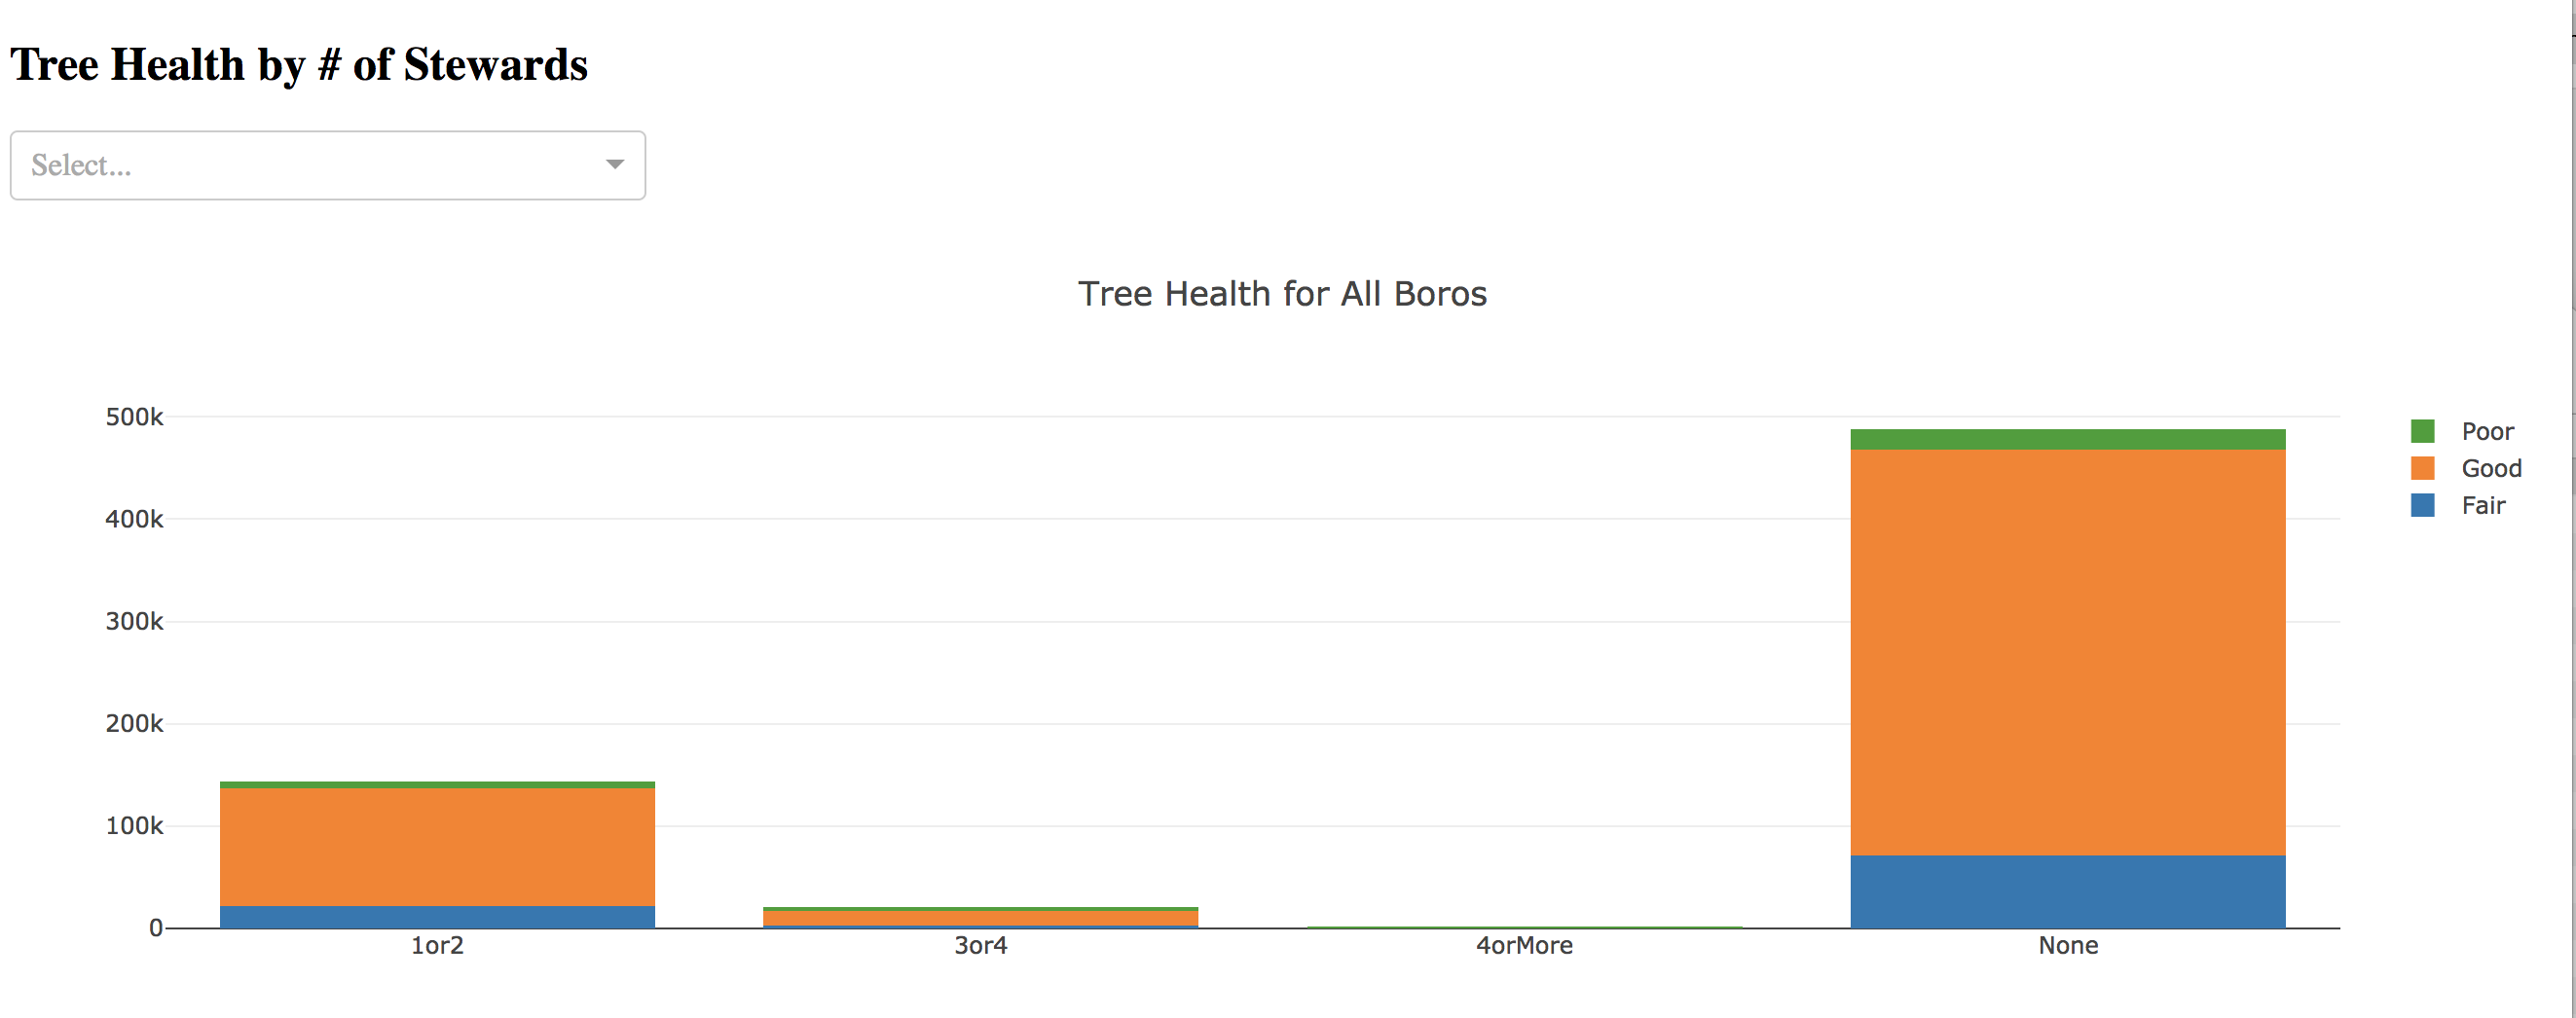